In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ordered roughly by accuracy
cases = ['ADHD','ASD','SZ']

case_labels =       ['SZ          n=72',
                    'ASD        n=505',
                    'ADHD     n=358']
case_labels.reverse()

In [3]:
# ST
# ASD 69.6 SZ 67.7 ADHD 70.8

# MMOE
# ASD 71.7 SZ 57.8 ADHD 70.6

# MMOE
# ASD 73.1 SZ 84.9 ADHD 72.7

st_accuracy = [70.8, 69.6, 67.7]
sbm_accuracy = [70.6, 71.7, 57.8]
mmoe_accuracy = [72.7, 73.1, 84.9]

models = ['ST','SBM', 'MMOE']

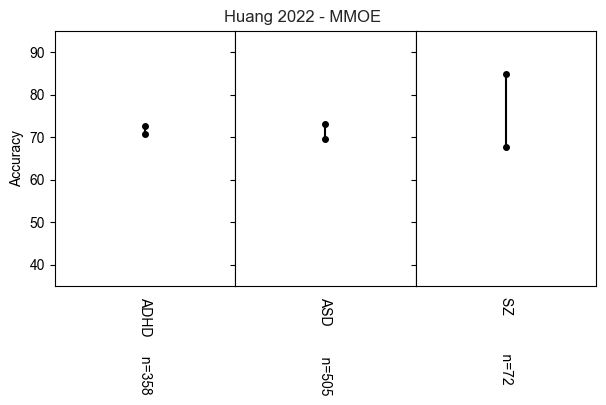

In [4]:
###############
# CONNECTOMES #
###############
title = 'Huang 2022 - MMOE'
fig,ax = plt.subplots(1,len(cases),figsize=(6,4),sharey=True,sharex=True)
plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,case in enumerate(cases):
    st_acc = st_accuracy[j]
    mtl_acc = mmoe_accuracy[j]
    if st_acc > mtl_acc:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_acc,mtl_acc),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(case_labels[j],rotation=270)

    lines = ax[j].get_ygridlines()
    b = lines[1]
    b.set_color('black')
    b.set_linewidth(1.15)
    b.set_linestyle('--')

ax[0].set_ylabel('Accuracy')
plt.suptitle(title)
plt.ylim(35,95)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
#plt.savefig(os.path.join('/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/mtl/','figures/st_vs_mtl.png'),dpi=300)

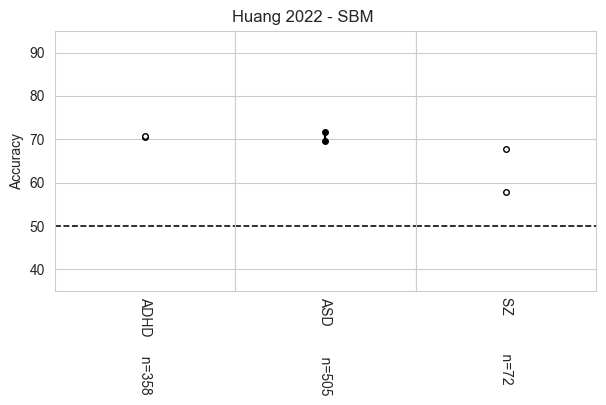

In [5]:
###############
# CONNECTOMES #
###############
title = 'Huang 2022 - SBM'
fig,ax = plt.subplots(1,len(cases),figsize=(6,4),sharey=True,sharex=True)
plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,case in enumerate(cases):
    st_acc = st_accuracy[j]
    mtl_acc = sbm_accuracy[j]
    if st_acc > mtl_acc:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_acc,mtl_acc),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(case_labels[j],rotation=270)

    lines = ax[j].get_ygridlines()
    b = lines[1]
    b.set_color('black')
    b.set_linewidth(1.15)
    b.set_linestyle('--')

ax[0].set_ylabel('Accuracy')
plt.suptitle(title)
plt.ylim(35,95)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
#plt.savefig(os.path.join('/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/mtl/','figures/st_vs_mtl.png'),dpi=300)

ADHD 0
ASD 1
SZ 2


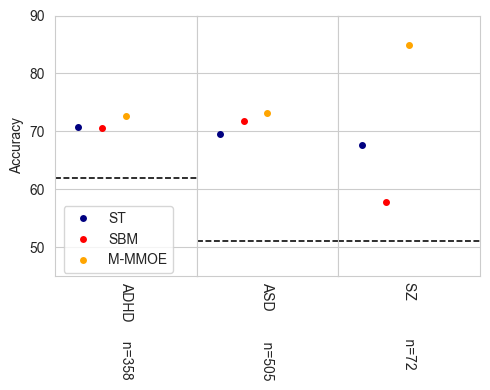

In [9]:
####################
# ACC CHANCE LEVEL #
####################

fig,ax = plt.subplots(1,len(cases),figsize=(5,4),sharey=True,sharex=True)

# BIP: 100 - 28 = 72
# SZ: 100 - 44 = 56
# ADHD: 100 - 39 = 61
plt.yticks([40,50,51,60,62,70,80,90],
           labels = [40,50,None,60,None,70,80,90])

sns.set_style('whitegrid')
colors = ['navy','red','orange','dodgerblue','forestgreen','navy','darkorchid','red']

for j,case in enumerate(cases):
    print(case, j)
    if case != '':
        for i,clf in enumerate(models):
            if clf == 'ST':
                acc = st_accuracy[j]
            elif clf == 'SBM':
                acc = sbm_accuracy[j]
            else:
                acc = mmoe_accuracy[j]

            marker='o'

            mfc = colors[i]
            ax[j].plot(i,acc,marker=marker,color=colors[i],ms=4,markerfacecolor=mfc)
            ax[j].set_xticklabels([])
            ax[j].set_xticks([])
            ax[j].set_xlim(-1,5)


            ax[j].set_xlabel(case_labels[j],rotation=270)

        lines = ax[j].get_ygridlines()

        if (case == 'ASD') | (case == 'SZ'):
            w1 = lines[2] # ASD SZ
            w1.set_color('black')
            w1.set_linewidth(1.15)
            w1.set_linestyle('--')

            w2 = lines[4] # ADHD
            w2.set_color('white')
            w2.set_linewidth(1.15)
            w2.set_linestyle('-')

        if case == 'ADHD':
            w1 = lines[2] # ASD SZ
            w1.set_color('white')
            w1.set_linewidth(1.15)
            w1.set_linestyle('-')

            w2 = lines[4] # ADHD
            w2.set_color('black')
            w2.set_linewidth(1.15)
            w2.set_linestyle('--')

from matplotlib.lines import Line2D
handles = [Line2D([0], [0], marker='o',color='w', label='ST',
                          markerfacecolor=colors[0]),
        Line2D([0], [0], marker='o', color='w', label='SBM',
                          markerfacecolor=colors[1]),
        Line2D([0], [0], marker='o', color='w', label='MMOE',
                          markerfacecolor=colors[2])
                          ]
labels = ['ST','SBM','M-MMOE']
fig.legend(handles, labels, loc=(0.13,0.3))
#handles, _ = ax[0].get_legend_handles_labels()
#labels = models

ax[0].set_ylabel('Accuracy')
#fig.legend(handles, labels, loc='lower right')
#plt.suptitle(title)
plt.ylim(45,90)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig('huang_results.png',dpi=300)